# APS1070
#### Lab 2 - Anomaly Detection Algorithm using Gaussian Mixture Model 
**Deadline: Feb 14, 23:59 - 10 points**

Please fill out the following:


*   Name: **Amey Mulay**
*   Student Number: **1005574530**

##**Marking Scheme:**

This project is worth **10 marks** of your final grade.

**One (1) mark** of the lab is dedicated to **vectorized coding**. If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases loops are inevitable).

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you to complete your tutorial (Although no mark is assigned to the **tutorial** compeleting that section is **mandatory**). 

**The exercise** section is worth **9 points**.

##**Important Note:**

1] Please **write answers** for the Tutorial & Exercise in the **blanks provided**.

2] Start lab early so that you understand concepts in Tutorial well & get enough time to implement exercise  

3] It is important to **complete and run the tutorial part** of the notebook. Make sure you complete both, tutorial as well as exercise part.
 
4] Provide a graphical representation of data wherever necessary.  


##Tutorial

In this part of the assignment, we will implement an anomaly detection algorithm using the Gaussian model to detect anomalous behavior in a 2D dataset first and then a high-dimensional dataset.

Loading relevant libraries and the dataset

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


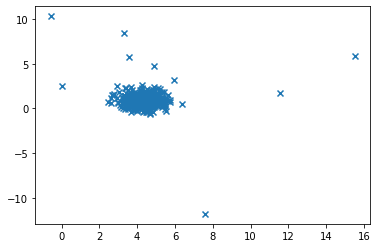

In [0]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=1,
                       cluster_std=0.60, random_state=0)
X_append, y_true_append = make_blobs(n_samples=10,centers=1,
                                    cluster_std=5,random_state=0)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:,0],X[:,1],marker="x");

In [0]:
len(y_true)

410

Here we've manufactured a dataset where some points are visibly outliers from the main distribution.

We can see this from looking at the plot, but how do we robustly identify the outliers? 

That's where a Gaussian estimation comes in. For this dataset, we only need a single Gaussian, for which we are gonna calculate the mean and standard deviation. Then, we're able to find the points that don't seem likely to have originated from that distribution - these are our outliers!

First, we need to calculate the mean and variance for our data. Complete the function below to generate these values using these formulas:

$$\mu = \frac{1}{m} \sum_{i=1}^{m}X_i$$

$$\sigma^2 = \frac{1}{m} \sum_{i=1}^{m}(X_i-\mu)^2$$

In [0]:
X.shape

(410, 2)

In [0]:
X

array([[ 4.98363526e+00,  8.97637672e-01],
       [ 4.68480619e+00,  1.07627418e+00],
       [ 4.48527047e+00,  1.01618041e+00],
       [ 4.53127837e+00,  9.66057830e-01],
       [ 4.51707640e+00, -8.48529919e-02],
       [ 3.36141328e+00,  1.36225876e+00],
       [ 5.47425256e+00, -4.74920358e-02],
       [ 4.87333521e+00,  1.17461613e+00],
       [ 5.12434567e+00,  9.22040874e-01],
       [ 4.43068554e+00,  1.73531678e+00],
       [ 4.90042396e+00,  2.01959369e+00],
       [ 4.36158014e+00,  1.07462722e+00],
       [ 4.60008939e+00,  1.00596707e+00],
       [ 4.09382131e+00,  3.58308909e-01],
       [ 4.70993215e+00,  1.23202532e+00],
       [ 4.17880807e+00,  1.32222457e+00],
       [ 4.38902441e+00,  1.19876508e+00],
       [ 4.17528733e+00,  2.08602483e+00],
       [ 4.33495456e+00,  4.31891060e-01],
       [ 4.49502392e+00,  1.52878537e+00],
       [ 4.41259038e+00,  7.12756365e-01],
       [ 4.35631807e+00,  1.54592256e+00],
       [ 4.06542424e+00,  5.93807863e-01],
       [ 4.

In [0]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean of X
    sum_ = sum(X)
    mu = sum_/len(X)
    
    # compute variance of X
    var = sum((Xi - mu) ** 2 for Xi in X) / len(X) #List comprehension: solution to vectorize coding
    
    return mu,var
mu, sigma2 = estimateGaussian(X)

In [0]:
print(mu, sigma2)

[4.30770882 0.9756171 ] [0.94147734 1.25990509]


In [0]:
mu.shape

(2,)

Now, we will calculate for each point in X, the probability of the distribution $N(\mu,\sigma^2)$ generating that point randomly. This has been completed for you, although it is important to understand how the calculation of the PDF works.

In [0]:
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    print(X.shape, mu.shape, sigma2.shape)
    sigma2=np.diag(sigma2)
    print(X.shape, mu.shape, sigma2.shape)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p

p = multivariateGaussian(X, mu, sigma2)

(410, 2) (2,) (2,)
(410, 2) (2,) (2, 2)


In [0]:
X.shape

(410, 2)

In [0]:
mu.shape

(2,)

In [0]:
p.shape

(410,)

In [0]:
print(p)

[1.14372564e-01 1.34958961e-01 1.43612050e-01 1.42299087e-01
 9.13712186e-02 8.55941312e-02 4.68240258e-02 1.21375203e-01
 1.02431905e-01 1.15288577e-01 7.86816997e-02 1.45340735e-01
 1.39595203e-01 1.22607393e-01 1.30647273e-01 1.38104619e-01
 1.42770647e-01 8.87545860e-02 1.29903618e-01 1.27032472e-01
 1.41351478e-01 1.28275607e-01 1.33684728e-01 1.42781106e-01
 9.32548041e-02 1.40465740e-01 1.16482935e-01 3.26217842e-02
 1.27768034e-01 1.40703489e-01 1.31726540e-01 5.68406205e-02
 1.43043322e-01 1.36223637e-01 1.13402764e-01 9.72356144e-02
 9.48531746e-02 1.33446142e-01 1.21499229e-01 4.97153521e-02
 1.09486962e-01 1.04598457e-01 1.33181817e-01 1.28145276e-01
 1.21108955e-01 9.37073350e-02 1.34444713e-01 1.45205701e-01
 1.33931685e-01 1.06246973e-01 1.39179756e-01 7.44308998e-02
 9.90408123e-02 8.95211071e-02 5.32404834e-02 8.78335694e-02
 1.43159611e-01 5.50347568e-02 5.33613370e-02 1.07679511e-01
 1.18411090e-01 1.42878452e-01 1.09469533e-01 4.97312568e-02
 1.40974086e-01 1.437390

Now that we have the probability of each point in the dataset, we can plot these on the original scatterplot:

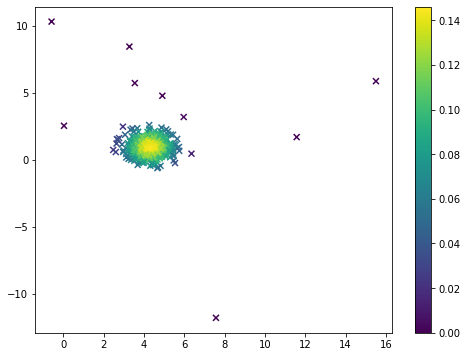

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
plt.colorbar();

We're getting closer to the point where we can programmatically  identify our outliers for a single Gaussian distribution. The last step is to identify a value for $p$, below which we consider a point to be an outlier. We term this $\epsilon$.

In [0]:
#Choose a value for epsilon

epsilon = 2.27216384e-02

Now we'll highlight on the scatter plot all points that are below $\epsilon$:

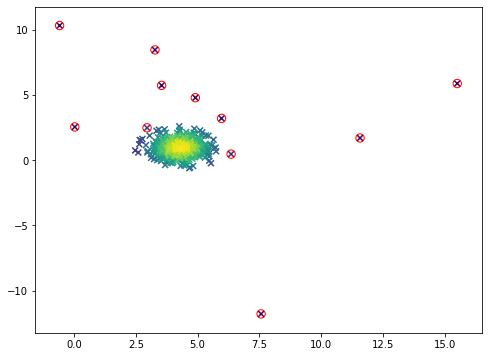

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

What value of epsilon did you choose? Why? **We know that the expected value or mean, w.r.t a normal curve, would have the highest probability and would fall as we move away from the mean. So, we tend to identify a probability value, p, away from the mean from the above PDF.**

Play around with different values until you're happy with the plot above. 

We can additionally look at our model's classification performance another way. By sorting the points ascending by their probability, and classifying the first $k$ points as anomalous, we can determine the model's precision@k. Implement this in the cell below. 

* What is the highest value of K for which we get a precision of 1.0? **9**
* What is the precision for K=4? **1.0**

In [0]:
from sklearn.metrics import precision_score
p_sorted = np.sort(p)
print(p_sorted)

[1.26233381e-34 4.23073323e-32 4.15537880e-22 7.82488149e-14
 1.99568216e-11 3.37349142e-06 1.38290013e-05 3.83756148e-04
 4.74648168e-03 1.41431979e-02 2.27216384e-02 2.40702571e-02
 2.93681580e-02 3.04253171e-02 3.26217842e-02 3.38849636e-02
 3.51459839e-02 3.60995963e-02 4.65133793e-02 4.65515204e-02
 4.66122166e-02 4.66902503e-02 4.68240258e-02 4.90513864e-02
 4.97153521e-02 4.97312568e-02 5.12785785e-02 5.16164391e-02
 5.32008348e-02 5.32404834e-02 5.33613370e-02 5.37924779e-02
 5.38115990e-02 5.48265247e-02 5.50347568e-02 5.53100511e-02
 5.57665393e-02 5.68406205e-02 5.69666730e-02 5.76201298e-02
 5.77375576e-02 5.86074431e-02 5.99137568e-02 6.11128547e-02
 6.13801591e-02 6.19680038e-02 6.22001685e-02 6.57628723e-02
 6.58037611e-02 6.61620528e-02 6.80010328e-02 6.82615541e-02
 6.84047207e-02 6.93234683e-02 6.93568142e-02 6.95628490e-02
 7.03926378e-02 7.06953001e-02 7.24336395e-02 7.37433713e-02
 7.43203353e-02 7.44308998e-02 7.44613636e-02 7.49053128e-02
 7.60161845e-02 7.726637

In [0]:
k_range = range(0,21)
for k in k_range:
  p_sorted_1 = p_sorted[k]
  y = p <= p_sorted_1
  z = precision_score(y_true, 1*y)
  print("The precision for k =", k, "is", z)

The precision for k = 0 is 1.0
The precision for k = 1 is 1.0
The precision for k = 2 is 1.0
The precision for k = 3 is 1.0
The precision for k = 4 is 1.0
The precision for k = 5 is 1.0
The precision for k = 6 is 1.0
The precision for k = 7 is 1.0
The precision for k = 8 is 1.0
The precision for k = 9 is 1.0
The precision for k = 10 is 0.9090909090909091
The precision for k = 11 is 0.8333333333333334
The precision for k = 12 is 0.7692307692307693
The precision for k = 13 is 0.7142857142857143
The precision for k = 14 is 0.6666666666666666
The precision for k = 15 is 0.625
The precision for k = 16 is 0.5882352941176471
The precision for k = 17 is 0.5555555555555556
The precision for k = 18 is 0.5263157894736842
The precision for k = 19 is 0.5
The precision for k = 20 is 0.47619047619047616


In [0]:
y.shape

(410,)

You may have noticed that in this example, we are training and testing on the _entire_ dataset. This is absolutely not standard practice! You should _always_ split into a training and testing set. However, the reason that we can get away with this here is that we don't actually use labels at all during training - this is an _unsupervised_ machine learning task. Unsupervised learning methods are beneficial for anomaly detection because in the real world (i.e. testing!) we might come across types of outliers that we didn't see during training. We want to use a method that can handle this, and unsupervised methods are often better suited to this type of domain.

For the next section, we'll move to a Mixture of Gaussian models. Take a look at the following dataset:

(149,)

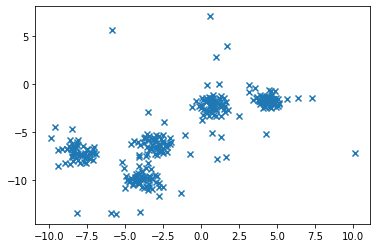

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
X, y_true = make_blobs(n_samples=400, centers=5,
                       cluster_std=0.60, random_state=1)
X_append, y_true_append = make_blobs(n_samples=50,centers=5,
                                    cluster_std=5,random_state=1)
X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=1, shuffle=True)

plt.scatter(X_train[:,0],X_train[:,1],marker="x");
y_test.shape

In [0]:
X_test

array([[  0.99431896,  -3.78391889],
       [  4.96515112,  -1.15616986],
       [  3.74655511,  -0.97929824],
       [  0.17872815,  -1.82592226],
       [  0.58181215,  -1.6293202 ],
       [ -7.74848568,  -7.52526808],
       [ -4.8360427 ,  -8.75824251],
       [ -9.21976793,  -8.51298398],
       [  0.7647957 ,  -1.873758  ],
       [  4.51758372,  -0.94020918],
       [ -3.46645042,  -5.80677949],
       [  6.8988732 ,  -4.30029334],
       [ -7.41348859,  -6.8445431 ],
       [  4.86369658,  -1.52150306],
       [ -7.60121734,  -6.45880588],
       [ -3.12923147,  -6.94285743],
       [  0.78710822,  -2.36703488],
       [ -3.57249635,  -5.3022484 ],
       [  4.85673685,  -1.13822821],
       [  4.65183019,  -0.98670928],
       [ -8.47556192,  -7.48568884],
       [ -0.89826316,  -2.12852659],
       [ -3.32668329,  -9.5111415 ],
       [  5.31837996,  -0.98058227],
       [ -4.17801154,  -9.52069685],
       [ -8.21826334,  -7.1064794 ],
       [ -8.63219572, -10.61216363],
 

Okay, we have more than one cluster centre now. So what? Let's just ignore that and use the same model as before. 

* What is the precision for k=1 in the cell below? **1.0**
* k=10? **0.8181818181818182**
* k=100? **0.12871287128712872**

In [0]:
mu.shape


(2,)

(149, 2) (2,) (2,)
(149, 2) (2,) (2, 2)


(149,)

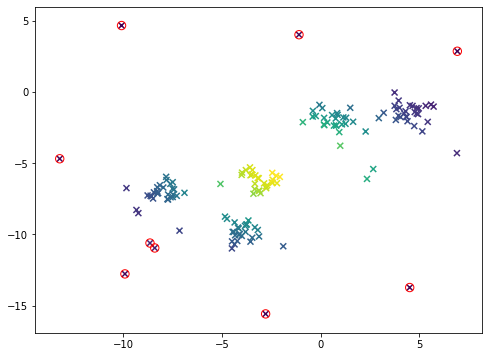

In [0]:
mu, sigma2 = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma2)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],marker="x",c=p,cmap='viridis');
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);
p.shape

In [0]:
p_sorted_new = np.sort(p)
print(p_sorted_new)

[2.80349618e-05 8.57742600e-05 1.36512473e-04 1.90292767e-04
 1.97767669e-04 2.82701997e-04 3.29587733e-04 9.13496957e-04
 9.78595695e-04 1.07099534e-03 1.07303153e-03 1.22869499e-03
 1.31645194e-03 1.44729055e-03 1.49108905e-03 1.54091018e-03
 1.56992656e-03 1.61652808e-03 1.62623987e-03 1.65511544e-03
 1.68064743e-03 1.71781012e-03 1.72503493e-03 1.74492834e-03
 1.74958606e-03 1.76958244e-03 2.01023472e-03 2.04125612e-03
 2.09638181e-03 2.15916516e-03 2.18758310e-03 2.21764779e-03
 2.23836879e-03 2.24237699e-03 2.25064146e-03 2.33056233e-03
 2.35220371e-03 2.40041844e-03 2.47758006e-03 2.48746916e-03
 2.52326106e-03 2.65773260e-03 2.68325443e-03 2.69164592e-03
 2.72253867e-03 2.82260640e-03 2.89720798e-03 2.92595547e-03
 2.93119841e-03 3.04261749e-03 3.07370454e-03 3.07524121e-03
 3.12912656e-03 3.13578181e-03 3.24184578e-03 3.24840256e-03
 3.41070788e-03 3.42065671e-03 3.44808159e-03 3.46497155e-03
 3.57118176e-03 3.59020733e-03 3.63326841e-03 3.65728739e-03
 3.66346103e-03 3.664918

In [0]:
k_range = range(0,110)
for k in k_range:
  p_sorted_1_new = p_sorted_new[k]
  y_new = p <= p_sorted_1_new
  z_new = precision_score(y_test, 1*y_new)
  print("The precision for k =", k, "is", z_new)

The precision for k = 0 is 1.0
The precision for k = 1 is 1.0
The precision for k = 2 is 1.0
The precision for k = 3 is 1.0
The precision for k = 4 is 1.0
The precision for k = 5 is 1.0
The precision for k = 6 is 1.0
The precision for k = 7 is 1.0
The precision for k = 8 is 1.0
The precision for k = 9 is 0.9
The precision for k = 10 is 0.8181818181818182
The precision for k = 11 is 0.75
The precision for k = 12 is 0.7692307692307693
The precision for k = 13 is 0.7857142857142857
The precision for k = 14 is 0.7333333333333333
The precision for k = 15 is 0.6875
The precision for k = 16 is 0.6470588235294118
The precision for k = 17 is 0.6111111111111112
The precision for k = 18 is 0.5789473684210527
The precision for k = 19 is 0.55
The precision for k = 20 is 0.5238095238095238
The precision for k = 21 is 0.5
The precision for k = 22 is 0.4782608695652174
The precision for k = 23 is 0.4583333333333333
The precision for k = 24 is 0.44
The precision for k = 25 is 0.4230769230769231
The pre

Uh oh. This model performs terribly. It's fit the mean to a section of space where we don't have _any_ points, and it has absolutely no idea which points are outliers! This was probably pretty obvious to you though. We need to move to a Mixture of Gaussians model - one in which we use multiple Gaussians to fit the data. We'll use `sklearn.mixture.GaussianMixture` to do this - or rather you will! Use the documentation, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) to initialise and fit a `GaussianMixture` object called `gm` in the cell below.

In [0]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Now we can use the method `gm.score_samples()` which gives a score based on how likely a point is to have been generated by any cluster:

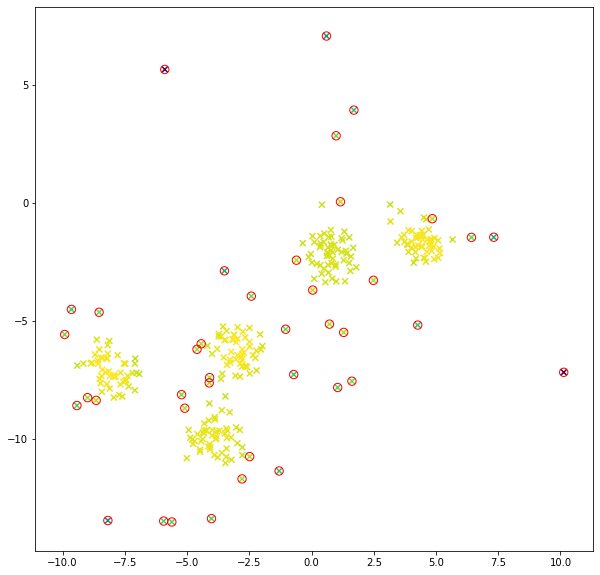

In [0]:
plt.figure(figsize=(10,10))
c = gm.score_samples(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c=gm.score_samples(X_train),cmap='viridis',marker='x')

threshold= -4.8

outliers = np.nonzero(c<threshold)[0]
plt.scatter(X_train[outliers,0],X_train[outliers,1],marker="o",facecolor= "none",edgecolor="r",s=70)

What is the variable "`threshold`"? **If we want to classify a datapoint as an outlier or non-outlier, then we need to a way to turn probabalities into classifications and one way of doing that is by setting a threshold.**

Why is it negative? **The function gm.score_samples() returns the computed log probabilities of each point in the input data and log of probabilities ranging from 0 to 1 returns negative value. Hence, for classification purpose, we set a negative threshold.**
 
Now we can use the method `gm.predict_proba()` to spot the points in each of the clusters.

In [0]:
Non_Outliers=np.nonzero(c>=threshold)[0]
X_t=X_train[Non_Outliers]

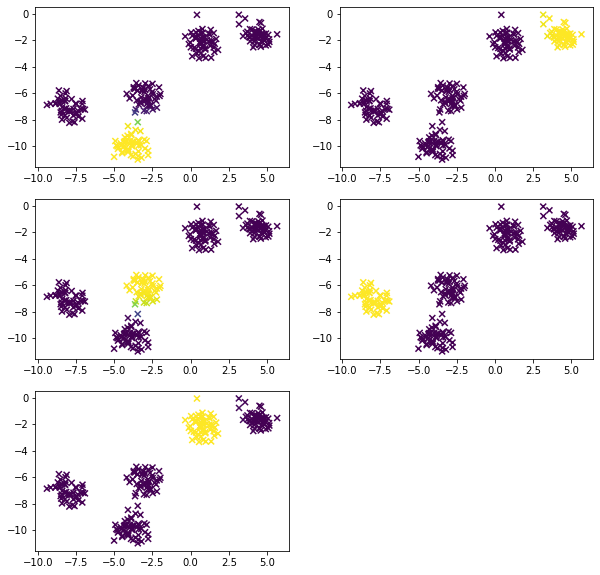

In [0]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.scatter(X_t[:,0],X_t[:,1],c=gm.predict_proba(X_t)[:,i],cmap='viridis',marker='x')

1] What do functions `gm.score_samples()` and `gm.predict_proba()` return? **'gm.score_samples' computes the weighted log probabilities for each sample while 'gm.predict_proba()'predicts posterior or conditional probability of each component given the data.**

2] Why it was important to run them in above sequence? **First, the gm.score_samples() helps to obtain the probability density function from the X_train dataset at hand after which the conditional probablity of each sample in a given cluster can be found.**

3] What is the difference between the two function? **The gm.score_samples() forms clusters with the help of creation of PDF whereas the predict_proba method predicts the responsibilities for each Gaussian. In other words, the probability that a particular data point came from each distribution.**


Our Mixture of Gaussians model is powerful! Not only is it unsupervised, it can both classify points into one of the K clusters we have, _and_ it can help us with our ultimate goal of identifying outlier points! We can do this by finding the points that no cluster wants to claim for itself.

In the cell below, complete the code and calculate these values and then compute precision@k for k=1, 10, and 100. The ROC curve code has been completed for you. **The precision and recall:**
**for k = 1 are 1.0 and 0.1111111111111111 respectively**

**for k = 10 are 1.0 and 0.6111111111111112 respectively**

**for k = 100 are 0.1782178217821782 and 1.0 respectively** 

* Is this model better or worse performing than the previous? **This model performs better than the previous one.**
* Why might that be? **That is because the guassian mixture maximizes the True Positive Rate and minimizes False Positive Rate.**

Precision and recall score for the run 0 : 1.0 and 0.05555555555555555 respectively
Precision and recall score for the run 1 : 1.0 and 0.1111111111111111 respectively
Precision and recall score for the run 2 : 1.0 and 0.16666666666666666 respectively
Precision and recall score for the run 3 : 1.0 and 0.2222222222222222 respectively
Precision and recall score for the run 4 : 1.0 and 0.2777777777777778 respectively
Precision and recall score for the run 5 : 1.0 and 0.3333333333333333 respectively
Precision and recall score for the run 6 : 1.0 and 0.3888888888888889 respectively
Precision and recall score for the run 7 : 1.0 and 0.4444444444444444 respectively
Precision and recall score for the run 8 : 1.0 and 0.5 respectively
Precision and recall score for the run 9 : 1.0 and 0.5555555555555556 respectively
Precision and recall score for the run 10 : 1.0 and 0.6111111111111112 respectively
Precision and recall score for the run 11 : 1.0 and 0.6666666666666666 respectively
Precision and r

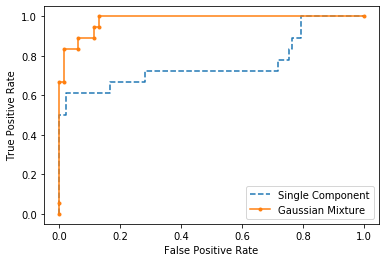

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#This part outputs the precision and recall on the test set

#score_samples will compute the weighted log probabilities for each sample
p_gm = gm.score_samples(X_test) 

#Complete code below
i_range = np.arange(110)
for i in i_range: 
   #sort the points by probability, as before
   mn_gm = np.sort(p_gm)
   mn_gm_sorted = mn_gm[i]
   new = p_gm <= mn_gm_sorted
   #compare y_test labels to our picks using precision
   precision = precision_score(y_test, new) 
   #compare y_test labels to our picks using recall
   recall =  recall_score(y_test, new)
   #print precision and recall three times
   print("Precision and recall score for the run", i, ":", precision, "and", recall, "respectively")

#This part computes the ROC curves for both models like we talked about in class

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-p)
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()


Let's look at a dataset that motivates using a Mixture of Gaussians model: Simpsons ratings.

Everyone knows that there's a certain point when The Simpsons "got bad", but can we use a Mixture of Gaussians to find out exactly when that was?

Load up the `simpsons.pickle` file using the cell below. It contains the IMDb rating for every simpsons episode.

In [0]:
!wget https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
with open('simpsons.pickle','rb') as f:
    simpsons = pickle.load(f)

--2020-02-15 01:09:14--  https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle [following]
--2020-02-15 01:09:15--  https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26076 (25K) [application/octet-stream]
Saving to: ‘simpsons.pickle.2’

simpsons.pickle.2   100%[===================>]  25.46K  --.-KB/s    in 0.01s   

2020-02-15 01:09:15 (2.52 MB/s) - ‘simpsons.pickle.2’ saved [26076/26076]



Plot a histogram of the rating distribution for all Simpsons episodes. 

* What is the modal rating? **7.1** **(from stats module from scipy package)**
* What is the range of ratings? **5.300000000000001** **(from stats module from scipy package)**

In [0]:
simpsons #Simpsons is a dict

{1: {'Bart the General': 8.1,
  'Bart the Genius': 7.8,
  "Homer's Night Out": 7.4,
  "Homer's Odyssey": 7.4,
  'Krusty Gets Busted': 8.4,
  'Life on the Fast Lane': 7.5,
  'Moaning Lisa': 7.6,
  'Simpsons Roasting on an Open Fire': 8.2,
  'Some Enchanted Evening': 7.8,
  'The Call of the Simpsons': 7.8,
  'The Crepes of Wrath': 7.8,
  'The Telltale Head': 7.7,
  "There's No Disgrace Like Home": 7.7},
 2: {'Bart Gets Hit by a Car': 7.8,
  'Bart Gets an F': 8.2,
  'Bart the Daredevil': 8.4,
  'Bart vs. Thanksgiving': 7.8,
  "Bart's Dog Gets an F": 7.5,
  'Blood Feud': 7.9,
  'Brush with Greatness': 8.0,
  "Dancin' Homer": 7.5,
  'Dead Putting Society': 8.0,
  'Homer vs. Lisa and the 8th Commandment': 8.0,
  'Itchy and Scratchy and Marge': 8.1,
  "Lisa's Substitute": 8.5,
  'Oh Brother, Where Art Thou?': 8.3,
  'Old Money': 7.6,
  'One Fish, Two Fish, Blowfish, Blue Fish': 8.8,
  'Principal Charming': 7.5,
  'Simpson and Delilah': 8.3,
  'The War of the Simpsons': 7.9,
  'The Way We Was'

In [0]:
import pandas as pd

df = pd.DataFrame.from_dict(simpsons)
df

,30,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32
Bart's Not Dead,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heartbreak Hotel,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
My Way or the Highway to Heaven,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Treehouse of Horror XXIX,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baby You Can't Drive My Car,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Treehouse of Horror XXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Episode #31.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Episode #31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Episode #31.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


In [0]:
no_of_columns = range(1,32)
list_of_ratings = []
for i in no_of_columns:
    list_iteration = df[i].values 
    result = list_iteration[np.logical_not(np.isnan(list_iteration))]
    list_of_ratings.append(result)
    i = i+1
k = (list_of_ratings)
print(k)

[array([8.2, 7.8, 7.4, 7.7, 8.1, 7.6, 7.8, 7.7, 7.5, 7.4, 7.8, 8.4, 7.8]), array([8.2, 8.3, 8.3, 8.1, 7.5, 8. , 7.8, 8.4, 8.1, 7.8, 8.8, 8.3, 8. ,
       7.5, 8.3, 7.5, 7.6, 8. , 8.5, 7.9, 8.3, 7.9]), array([8.6, 7.8, 8.2, 8.6, 8.5, 7.7, 8.3, 7.9, 7.9, 8.8, 8.3, 8.3, 8.5,
       8. , 8.1, 8.3, 8.7, 8.2, 7.8, 8. , 8.3, 7.8, 7.8, 8.2]), array([8.5, 8.2, 9. , 7.8, 8.5, 8.2, 7.9, 8.2, 8.8, 8.6, 8.7, 9. , 8. ,
       8.2, 8.4, 8.4, 9.1, 7.1, 8.1, 8.1, 7.7, 8.2]), array([8.5, 9.1, 8.6, 8.9, 8.8, 8.1, 7.7, 8.7, 8.4, 8.6, 8.3, 8.2, 8.3,
       8.2, 8.8, 8.5, 7.9, 8.4, 8.4, 8.3, 7.6, 8.1]), array([8.7, 8.1, 5.9, 8.6, 8.3, 9.1, 8.1, 8.5, 9. , 8.1, 7.8, 9. , 8.7,
       8.7, 8.6, 8.5, 7.9, 8.5, 8.3, 8.2, 8.1, 8.2, 8.2, 8.7, 9.1]), array([9. , 8.3, 8.4, 8.8, 8.5, 8.6, 9. , 8.6, 8.1, 7.5, 8.4, 8.3, 8.6,
       7.7, 7.7, 8.2, 8.9, 8. , 8.2, 8.6, 8.9, 8.4, 8.1, 8. , 8.4]), array([8.4, 9.2, 8.1, 7.7, 8.3, 8.1, 7.9, 8.8, 8.6, 9.1, 7.8, 8.6, 7.7,
       8. , 8.8, 8.2, 8. , 8.8, 8.2, 7.7, 7.9, 8.1, 9.3, 

In [0]:
combined_list_of_ratings = np.concatenate(k)
print(combined_list_of_ratings)

[8.2 7.8 7.4 7.7 8.1 7.6 7.8 7.7 7.5 7.4 7.8 8.4 7.8 8.2 8.3 8.3 8.1 7.5
 8.  7.8 8.4 8.1 7.8 8.8 8.3 8.  7.5 8.3 7.5 7.6 8.  8.5 7.9 8.3 7.9 8.6
 7.8 8.2 8.6 8.5 7.7 8.3 7.9 7.9 8.8 8.3 8.3 8.5 8.  8.1 8.3 8.7 8.2 7.8
 8.  8.3 7.8 7.8 8.2 8.5 8.2 9.  7.8 8.5 8.2 7.9 8.2 8.8 8.6 8.7 9.  8.
 8.2 8.4 8.4 9.1 7.1 8.1 8.1 7.7 8.2 8.5 9.1 8.6 8.9 8.8 8.1 7.7 8.7 8.4
 8.6 8.3 8.2 8.3 8.2 8.8 8.5 7.9 8.4 8.4 8.3 7.6 8.1 8.7 8.1 5.9 8.6 8.3
 9.1 8.1 8.5 9.  8.1 7.8 9.  8.7 8.7 8.6 8.5 7.9 8.5 8.3 8.2 8.1 8.2 8.2
 8.7 9.1 9.  8.3 8.4 8.8 8.5 8.6 9.  8.6 8.1 7.5 8.4 8.3 8.6 7.7 7.7 8.2
 8.9 8.  8.2 8.6 8.9 8.4 8.1 8.  8.4 8.4 9.2 8.1 7.7 8.3 8.1 7.9 8.8 8.6
 9.1 7.8 8.6 7.7 8.  8.8 8.2 8.  8.8 8.2 7.7 7.9 8.1 9.3 7.3 7.9 9.1 7.
 8.1 8.2 8.2 7.7 7.8 8.1 7.6 7.6 5.  7.7 8.3 8.2 7.5 7.7 8.  7.9 8.2 7.9
 7.9 8.4 8.2 7.8 8.1 7.7 8.2 7.6 8.  7.3 7.6 8.1 7.3 8.2 7.9 7.8 7.  7.8
 7.3 7.3 7.5 7.7 7.4 7.6 7.3 7.2 7.4 8.  7.4 7.5 7.5 7.7 7.7 7.3 7.  7.1
 7.4 7.3 6.8 7.3 6.5 7.7 7.3 7.3 7.  7.4 6.5 7.1 7.2 

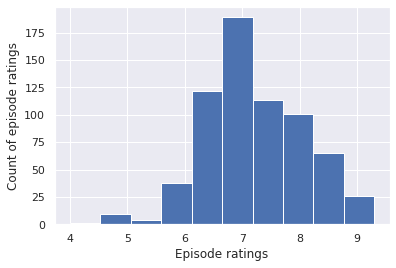

In [0]:
import seaborn as sns
import collections
sns.set()
plt.figure()
plt.hist(combined_list_of_ratings)
plt.xlabel('Episode ratings')
plt.ylabel('Count of episode ratings');
plt.show()

In [0]:
from scipy import stats 
stats.mode(combined_list_of_ratings) #from stats module from scipy package

ModeResult(mode=array([7.1]), count=array([43]))

In [0]:
max(combined_list_of_ratings) - min(combined_list_of_ratings) #from stats module from scipy package

5.300000000000001

Next, use Gaussian Mixture to fit a Mixture of Gaussians to the Simpsons rating distribution. Since we are trying to distinguish between good and bad ratings, we only need 2 gaussians.

* What are the means for the two Gaussians fit by the model? **The two means are 6.78605364 and 8.20285365**
* What about the standard deviations? **The two standard devaitions are 0.5940464615603411 and 0.45759091598295293**

In [0]:
X_train = combined_list_of_ratings
X_train = np.reshape(X_train, (668,1))

In [0]:
gm = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
mean = gm.means_
print("The mean of the two guassians:", mean)

The mean of the two guassians: [[6.78605364]
 [8.20285365]]


In [0]:
covariances = gm.covariances_
print("The covariances of the two guassians:", covariances)

The covariances of the two guassians: [[[0.3528912 ]]

 [[0.20938945]]]


In [0]:
covariances_1D = covariances.ravel()
print(covariances_1D)

[0.3528912  0.20938945]


In [0]:
import math
std_deviation = []
k_range = np.arange(2)
for k in k_range:
  std_deviation_1 = math.sqrt(covariances_1D[k])
  std_deviation.append(std_deviation_1)
print(std_deviation)

[0.5940464615603411, 0.45759091598295293]


Finally, using the `GuassianMixture.predict()` method, we can use maximum likelihood to estimate which distribution, good or bad, each episode belongs to. In the cell below, we have provided code to count the number of episodes predicted to be in the "good" distribution per season, and plot for the same.
Understand the code and answer the question.

* Where is the notable drop-off point? **Approximately, at a rating of 9.5 and 8th season**
* What is the first season with 0 good episodes? **15th season**


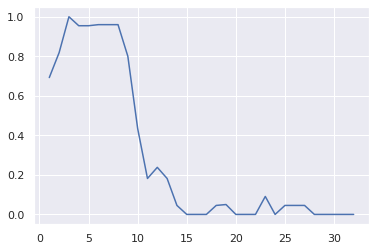

In [0]:
#Let's first associate each component with a good or bad season
if gm.means_[0,0] > gm.means_[1,0]: #True if first component is the good season (ie, higher mean)
     Good_season_index = 0
else:
     Good_season_index = 1

Xs = []
Ys = []
simpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))
for season, episodes in simpsons.items():
     bad = 0
     good = 0
     for episode in episodes.values():
          if gm.predict(np.array(
               episode
          ).reshape(-1,1)) == Good_season_index:
               good += 1
          else:
               bad += 1
     Xs.append(season)
     Ys.append(good/(good+bad))
plt.plot(Xs,Ys);

## Exercises

Now we are going to work with a credit card fraud dataset (more detail can be found [here](https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3)). This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load up the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?[0.5] **284807 rows**
* What features in the dataset are present aside from the 28 main features?[0.5]  **Time, and Amount**
* Why do you think the main features are given to us in this way?[0.5] **Features V1, V2, ... V28 are the principal components obtained with PCA due to confidentiality issues and sensitive background information.**
* Which column contains the targets? Can you figure out what the values correspond to?[0.5] **The "Class" column contains the target.** **Class = 1 represents fraud transactions while class = 0 represents valid transactions.**

In [0]:
pip install wget

In [0]:
import wget

wget.download('https://github.com/alexwolson/APS1070_data/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [0]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df.head(10)
df.iloc[:, : 10]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739
...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087


In [0]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [0]:
print("Number of fradulant transactions =", len(df[df['Class'] == 1]))
#Class = 1 signifies fradulant transactions (derived from kaggle webpage)

Number of fradulant transactions = 492


In [0]:
print("NUmber of valid transactions =", len(df[df['Class'] == 0]))
#Class = 0 signifies valid transactions (derived from kaggle webpage)

NUmber of valid transactions = 284315


In [0]:
fraud = df[df['Class'] == 1] 
valid = df[df['Class'] == 0] 
outlier_percent = len(fraud)/float(len(valid))*100 
non_outlier_percent = 100-(len(fraud)/float(len(valid))*100)
print('Fraud Transactions: {}'.format(len(df[df['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))
print("Outlier_percent =", outlier_percent, "%")
print("Non-outlier_percent =", non_outlier_percent, "%") 

Fraud Transactions: 492
Valid Transactions: 284315
Outlier_percent = 0.17304750013189596 %
Non-outlier_percent = 99.8269524998681 %


It's always important when looking at a new dataset to figure out how many rows we have for each class.

* What is the percentage of entries in the dataset for each class?[0.5] **Percent of class 0 i.e. valid transactions = 99.8269524998681% and percent of class 1 i.e. fraud transactions = 0.17304750013189596%**
* Is this target data balanced or unbalanced? why do you think this is so?[0.5]  **The dataset is imbalanced because the number of valid transactions is large in comparison to the small number of fraud cases of transaction (0.17%).**
* Why might this pose a problem when methods we have looked at so far?[1] **The model would almost always yield a high accuracy as over 99% of the tranacations are valid thereby making the model appear fit for application.**



Next, split the dataset into a training and testing set. Use a test size of one third, and set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V24? Make sure to only use your training set for this. [1] **Mean = 0.000294 and Standard deviation = 0.604864**

Use the code below to set up a Gaussian object for V24.

In [0]:
df_1= df.drop(["Class"], axis = 1)
df_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [0]:
df_2 = df['Class']
df_2

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [0]:
X2 = df_1
y2 = df_2
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=0, shuffle=True)

In [0]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000
mean,94813.975275,0.000250,-0.003040,-0.001557,0.001140,-0.001209,0.000036,-0.001151,-0.002020,-0.000571,0.001801,-0.000984,-0.001883,0.002163,0.000863,0.000162,0.000165,0.000609,-0.000323,0.000797,0.000246,-0.000681,-0.000391,-0.000594,0.000294,0.000188,-0.000217,0.000042,0.000066,88.677410
std,47514.214448,1.965457,1.658139,1.516553,1.417932,1.372321,1.329107,1.228864,1.209241,1.102677,1.092063,1.019969,0.996657,0.997878,0.956462,0.916460,0.875862,0.850101,0.837395,0.814960,0.770402,0.742289,0.727514,0.629233,0.604864,0.521318,0.481511,0.401457,0.323809,246.300358
min,0.000000,-46.855047,-63.344698,-33.680984,-5.560118,-42.147898,-23.496714,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-17.769143,-5.791881,-19.214325,-4.498945,-14.129855,-24.019099,-9.498746,-7.213527,-23.646890,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.534330,-22.565679,-11.710896,0.000000
25%,54132.750000,-0.921287,-0.601963,-0.893090,-0.848352,-0.691903,-0.769041,-0.554462,-0.209050,-0.646238,-0.535327,-0.763021,-0.407260,-0.647306,-0.424496,-0.584348,-0.468450,-0.483766,-0.498850,-0.456764,-0.211684,-0.229478,-0.545075,-0.161977,-0.354114,-0.316215,-0.327388,-0.070762,-0.052923,5.600000
50%,84637.500000,0.020151,0.063791,0.177196,-0.018028,-0.055393,-0.274434,0.039742,0.021776,-0.050818,-0.091919,-0.033742,0.138257,-0.011879,0.051381,0.048939,0.067443,-0.064921,-0.002919,0.004104,-0.063003,-0.029111,0.006675,-0.010766,0.040758,0.017660,-0.052197,0.001117,0.011156,22.000000
75%,139379.500000,1.316737,0.802789,1.025456,0.744866,0.609359,0.398845,0.569311,0.326841,0.596965,0.459214,0.738064,0.617324,0.665177,0.494313,0.649651,0.522867,0.401099,0.499701,0.460058,0.132636,0.186606,0.530711,0.147733,0.438664,0.350953,0.240881,0.090626,0.078104,77.500000
max,172792.000000,2.451888,22.057729,9.382558,16.715537,34.099309,23.917837,44.054461,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,7.059132,9.207059,5.041069,5.572113,39.420904,27.202839,10.503090,22.083545,4.022866,7.519589,3.463246,12.152401,22.620072,19656.530000


In [0]:
from scipy import stats

norm = stats.norm(loc = 0.000294 , scale = 0.604864 
    #Put your code here
)

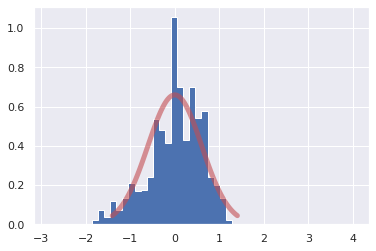

In [0]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train['V24'].values, density=True, histtype='stepfilled', bins=50);
plt.show()

We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

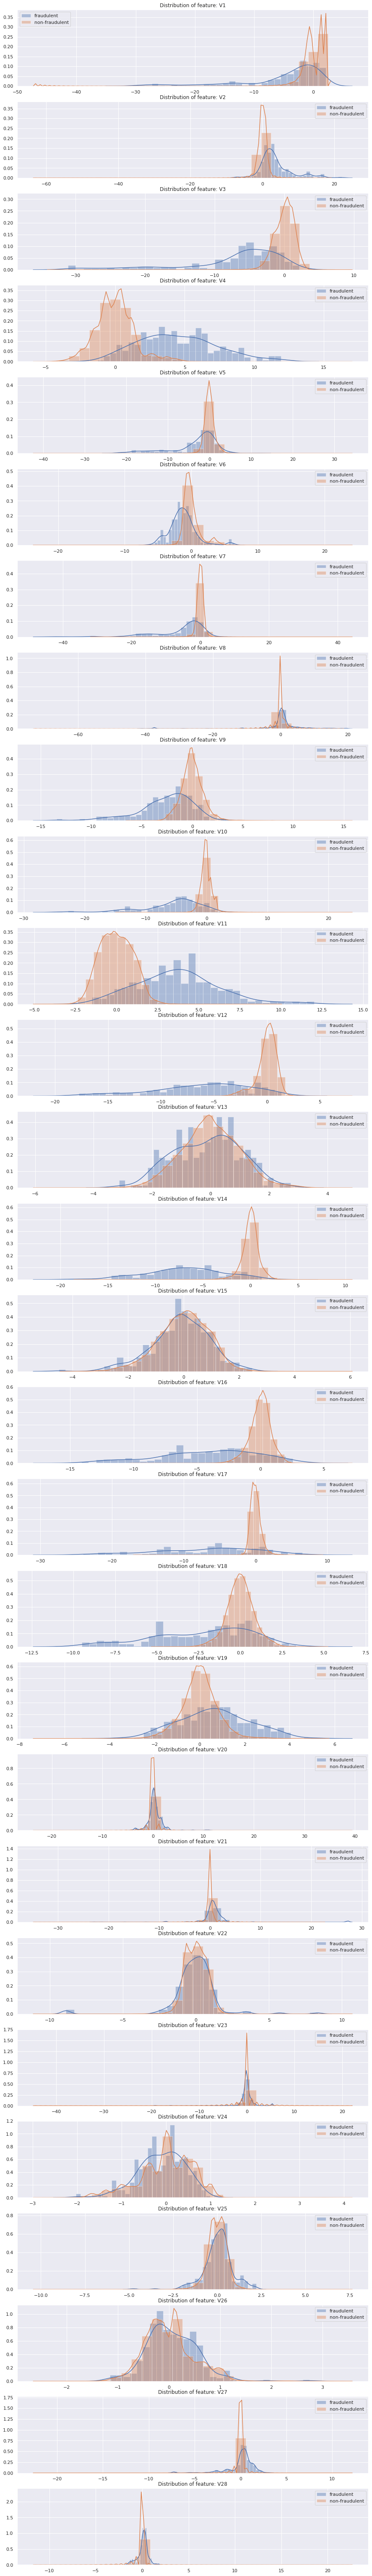

In [0]:
import matplotlib.gridspec as gridspec
import seaborn as sns
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [0]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


1] Build an outlier detection model using a Mixture of Gaussians using five features with a large difference in distribution between fraudulent and non-fraudulent data. Report the precision and recall @k for k=1, 10 and 100 (on test data). Repeat this model creation process, this time selecting five features with a of your own choice, and reporting the precision and recall as above. [2]
**The precision and recall (for five features with a large difference in distribution between fraudulent and non-fraudulent data):** 

**for k = 1 are 0.0 and 0.0 respectively**, 

**for k = 10 are 0.45454545454545453 and 0.030864197530864196 respectively and**

**for k = 100 are 0.4158415841584158 and 0.25925925925925924 respectively.** 

**The precision and recall (for five features with a least difference in distribution between fraudulent and non-fraudulent data):**

**for k = 1 are 0.0 and 0.0 respectively**

**for k = 10 are 0.0 and 0.0 respectively and**

**for k = 100 are 0.37623762376237624 and 0.2345679012345679 respectively.**

2] What features did you choose for each model? What effect it had on the model performance? [1] **For five features with a large difference in distribution between fraudulent and non-fraudulent data: ['V13', 'V15', 'V17', 'V18', 'V11']**

**For five features with a least difference in distribution between fraudulent and non-fraudulent data: ['V14', 'V16', 'V23', 'V25', 'V26']**

**Effect: The precision and recall declines for features with least difference in distribution between fraudulent and non-fraudulent data.**

3] Organize your findings in a table or plot and describe your findings. What can you conclude about what models work best?[1] **The plots and tables have been illustrated at the bottom of the exercise.** 

**Conclusion: The guassian mixture model learns and predicts better from  large difference in distribution comapred to least difference between fraudulent and non-fraudulent data as the mean and variance of the two datasets in a feature can be differentiated by the model better.** 

In [0]:
df_selected = X_train[['V13', 'V15', 'V17', 'V18', 'V11']]
df_selected

,V13,V15,V17,V18,V11
22827,0.405993,0.452350,-0.344234,0.836372,-0.490759
104281,0.760660,0.668173,-0.973930,0.543510,1.169334
55205,-0.444117,-0.959016,-0.642885,0.345980,0.674933
124479,-0.977793,-0.159776,0.952616,-0.020062,-0.999535
75718,-1.197975,-0.175797,0.375651,0.185812,0.199895
...,...,...,...,...,...
211543,-0.932355,0.341994,0.227999,-0.130957,-2.000050
86293,1.394628,2.224552,1.405911,-2.125462,1.005350
122579,0.158524,-0.242395,0.089840,0.233003,0.536337
152315,-0.092307,-0.674104,0.513497,0.059191,1.180940


In [0]:
array = df_selected.to_numpy()
array

array([[ 0.40599279,  0.45234996, -0.34423356,  0.83637173, -0.4907585 ],
       [ 0.7606597 ,  0.66817287, -0.97392979,  0.54350995,  1.16933371],
       [-0.44411712, -0.95901568, -0.64288481,  0.34597987,  0.67493315],
       ...,
       [ 0.15852441, -0.24239464,  0.08983971,  0.23300344,  0.5363366 ],
       [-0.09230696, -0.6741041 ,  0.51349702,  0.05919093,  1.18093991],
       [ 0.52480354,  1.68285661, -0.55825561,  0.57803239, -1.16026502]])

In [0]:
array.shape

(190820, 5)

In [0]:
190820*5

954100

In [0]:
X_5 = array.reshape(954100,1)
X_5

array([[ 0.40599279],
       [ 0.45234996],
       [-0.34423356],
       ...,
       [-0.55825561],
       [ 0.57803239],
       [-1.16026502]])

In [0]:
X_5.shape

(954100, 1)

In [0]:
gm = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_5)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
mu_1 = gm.means_
print("The mean of the five guassians:", mu_1)

The mean of the five guassians: [[ 0.03830464]
 [ 0.80620288]
 [-0.59159495]
 [ 1.28745414]
 [-0.6939973 ]]


In [0]:
sigma2_5 = gm.covariances_
print("The sigma2_5 of the five guassians:", sigma2_5)

The sigma2_5 of the five guassians: [[[0.11188617]]

 [[0.16533471]]

 [[1.7390935 ]]

 [[0.59831773]]

 [[0.19625045]]]


In [0]:
sigma2_5.shape

(5, 1, 1)

In [0]:
sigma2_5 = np.squeeze(sigma2_5, axis=1)
print(sigma2_5.shape, mu_1.shape,X_5.shape)

(5, 1) (5, 1) (954100, 1)


In [0]:
sigma2_5= sigma2_5.reshape(5,)
sigma2_5.shape

(5,)

In [0]:
X_5 = array

In [0]:
def multivariateGaussian(X_5, mu_1, sigma2_5):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k_5 = len(mu_1)
    print(X_5.shape, mu_1.shape, sigma2_5.shape)    
    sigma2_5=np.diag(sigma2_5)
    X_5 = X_5 - mu_1.T
    print(X_5.shape, mu_1.shape, sigma2_5.shape)
    p_5 = 1/((2*np.pi)**(k_5/2)*(np.linalg.det(sigma2_5)**0.5))* np.exp(-0.5* np.sum(X_5 @ np.linalg.pinv(sigma2_5) * X_5,axis=1))

    return p_5

p_5 = multivariateGaussian(X_5, mu_1, sigma2_5)

(190820, 5) (5, 1) (5,)
(190820, 5) (5, 1) (5, 5)


In [0]:
p_5

array([4.59114677e-02, 1.31041561e-06, 1.88907400e-08, ...,
       4.04901882e-05, 5.18916357e-09, 2.10809447e-03])

In [0]:
X_test_1 = X_test[['V13', 'V15', 'V17', 'V18', 'V11']]
X_test_1

,V13,V15,V17,V18,V11
183484,1.145965,-0.247178,0.846606,0.379454,-1.118863
255448,-0.806471,-0.108158,0.492095,-0.148516,-0.854776
244749,-1.516835,0.041437,-1.136766,0.816653,-1.726259
63919,-0.336022,1.812232,0.116347,0.291818,1.551682
11475,0.409266,-0.868774,1.878003,-1.906559,0.664531
...,...,...,...,...,...
180302,0.580103,-0.504519,-0.292255,-0.963832,-0.439811
183903,-0.251211,0.159361,-1.132202,1.037913,-0.221675
49613,0.009472,-1.869976,0.274148,0.114039,0.458601
244866,-0.493287,-0.356297,0.739579,-0.198875,-0.110483


In [0]:
X_test_array = X_test_1.to_numpy()
X_test_array

array([[ 1.14596495, -0.24717793,  0.84660574,  0.37945439, -1.11886302],
       [-0.80647083, -0.10815753,  0.49209538, -0.14851593, -0.85477634],
       [-1.51683492,  0.04143705, -1.13676647,  0.81665292, -1.7262591 ],
       ...,
       [ 0.00947226, -1.86997603,  0.27414813,  0.11403939,  0.45860063],
       [-0.49328712, -0.35629745,  0.73957937, -0.19887543, -0.11048333],
       [-0.0078852 , -0.1718351 ,  0.31614308,  0.50927927, -0.46417646]])

In [0]:
X_test_array.shape

(93987, 5)

In [0]:
gm = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )
gm.fit(array)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
#This part outputs the precision and recall on the test set

#score_samples will compute the weighted log probabilities for each sample
p_gm = gm.score_samples(X_test_array) 

precision_1_list = []
recall_1_list = [] 

#Complete code below
k_range = np.arange(110)
for k in k_range: 
   #sort the points by probability, as before
   mn_gm = np.sort(p_gm)
   mn_gm_sorted = mn_gm[k]
   new = p_gm <= mn_gm_sorted
   #compare y_test labels to our picks using precision
   precision_1 = precision_score(y_test, new) 
   #compare y_test labels to our picks using recall
   recall_1 =  recall_score(y_test, new)
   
   precision_1_list.append(precision_1)
   recall_1_list.append(recall_1)

   print("Precision and recall score for the k", k, ":", precision_1, "and", recall_1, "respectively")

Precision and recall score for the k 0 : 0.0 and 0.0 respectively
Precision and recall score for the k 1 : 0.0 and 0.0 respectively
Precision and recall score for the k 2 : 0.0 and 0.0 respectively
Precision and recall score for the k 3 : 0.25 and 0.006172839506172839 respectively
Precision and recall score for the k 4 : 0.2 and 0.006172839506172839 respectively
Precision and recall score for the k 5 : 0.3333333333333333 and 0.012345679012345678 respectively
Precision and recall score for the k 6 : 0.42857142857142855 and 0.018518518518518517 respectively
Precision and recall score for the k 7 : 0.5 and 0.024691358024691357 respectively
Precision and recall score for the k 8 : 0.4444444444444444 and 0.024691358024691357 respectively
Precision and recall score for the k 9 : 0.5 and 0.030864197530864196 respectively
Precision and recall score for the k 10 : 0.5454545454545454 and 0.037037037037037035 respectively
Precision and recall score for the k 11 : 0.5833333333333334 and 0.04320987

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


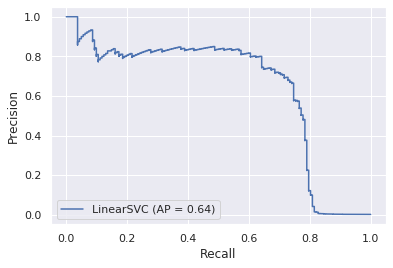

In [0]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn import svm

classifier = svm.LinearSVC()
classifier.fit(df_selected, y_train)
disp = plot_precision_recall_curve(classifier, X_test_1, y_test)

Selecting features of my choice and performing the same operations i.e.choosing five features with a large difference in distribution between fraudulent and non-fraudulent data.  

In [0]:
df_selected_1 = X_train[['V14', 'V16', 'V23', 'V25', 'V26']]
df_selected_1

,V14,V16,V23,V25,V26
22827,-0.542794,0.315830,-0.327215,0.578130,-0.154278
104281,0.046660,0.929527,-0.044063,0.165440,0.386638
55205,-0.135842,0.837336,0.028234,0.250185,-0.060125
124479,0.042723,-0.826886,-0.555391,0.437977,-0.114189
75718,0.589714,-0.647336,-0.421555,0.443550,-0.152744
...,...,...,...,...,...
211543,1.105463,-0.277885,0.008713,-0.397162,0.316379
86293,-0.461663,-1.222268,0.090535,-0.522294,0.296733
122579,0.125956,-0.116814,0.080444,0.297851,-0.495367
152315,1.359234,1.826172,0.115638,-0.596200,-0.295152


In [0]:
array_1 = df_selected_1.to_numpy()
array_1

array([[-0.54279376,  0.31582965, -0.3272147 ,  0.57812985, -0.15427789],
       [ 0.04665968,  0.9295267 , -0.04406267,  0.16543965,  0.38663758],
       [-0.13584177,  0.83733636,  0.02823438,  0.25018522, -0.06012462],
       ...,
       [ 0.12595607, -0.1168142 ,  0.08044435,  0.29785117, -0.49536742],
       [ 1.35923404,  1.82617249,  0.11563766, -0.59620012, -0.29515203],
       [-0.04321571,  0.22720288, -0.23813936, -0.24357281, -0.37091976]])

In [0]:
array_1.shape

(190820, 5)

In [0]:
190820*5

954100

In [0]:
myX_5 = array.reshape(954100,1)
myX_5

array([[ 0.40599279],
       [ 0.45234996],
       [-0.34423356],
       ...,
       [-0.55825561],
       [ 0.57803239],
       [-1.16026502]])

In [0]:
mygm = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )
mygm.fit(myX_5)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
mymu_1 = mygm.means_
print("The mean of the five guassians:", mymu_1)

The mean of the five guassians: [[ 0.03830464]
 [ 0.80620288]
 [-0.59159495]
 [ 1.28745414]
 [-0.6939973 ]]


In [0]:
mysigma2_5 = mygm.covariances_
print("The sigma2_5 of the five guassians:", mysigma2_5)

The sigma2_5 of the five guassians: [[[0.11188617]]

 [[0.16533471]]

 [[1.7390935 ]]

 [[0.59831773]]

 [[0.19625045]]]


In [0]:
mysigma2_5.shape

(5, 1, 1)

In [0]:
mysigma2_5 = np.squeeze(mysigma2_5, axis=1)
print(mysigma2_5.shape, mymu_1.shape, myX_5.shape)

(5, 1) (5, 1) (954100, 1)


In [0]:
mysigma2_5 = mysigma2_5.reshape(5,)
mysigma2_5.shape

(5,)

In [0]:
myX_5 = array_1

In [0]:
def multivariateGaussian(myX_5, mymu_1, mysigma2_5):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    myk_5 = len(mymu_1)
        
    mysigma2_5=np.diag(mysigma2_5)
    myX_5 = myX_5 - mymu_1.T
    myp_5 = 1/((2*np.pi)**(myk_5/2)*(np.linalg.det(mysigma2_5)**0.5))* np.exp(-0.5* np.sum(myX_5 @ np.linalg.pinv(mysigma2_5) * myX_5,axis=1))
    return myp_5

myp_5 = multivariateGaussian(myX_5, mymu_1, mysigma2_5)

In [0]:
myX_test_1 = X_test[['V14', 'V16', 'V23', 'V25', 'V26']]
myX_test_1

,V14,V16,V23,V25,V26
183484,-1.802360,-0.060945,-0.261613,0.211512,0.008297
255448,-0.770837,0.258964,-0.030360,-0.404816,0.134350
244749,0.348343,0.732681,0.965054,-1.801998,-1.041114
63919,0.278965,0.080001,0.150121,0.005183,-0.177847
11475,1.252202,0.214387,0.067055,0.379087,-0.268706
...,...,...,...,...,...
180302,0.009885,-0.245830,0.120783,-0.522603,0.109892
183903,-0.082111,0.799720,0.079867,-0.320231,-0.356028
49613,-1.001762,-0.511977,-0.309858,0.425786,-0.123203
244866,-0.195649,-0.139102,0.048296,-0.266043,0.567985


In [0]:
myX_test_array = myX_test_1.to_numpy()
myX_test_array

array([[-1.80235956, -0.06094535, -0.26161328,  0.2115123 ,  0.00829721],
       [-0.77083734,  0.25896429, -0.03035963, -0.40481559,  0.13434962],
       [ 0.34834277,  0.73268133,  0.96505436, -1.8019978 , -1.04111353],
       ...,
       [-1.00176193, -0.51197664, -0.30985785,  0.42578647, -0.12320339],
       [-0.19564896, -0.13910164,  0.04829612, -0.2660431 ,  0.56798505],
       [ 1.51874535,  0.4209654 ,  0.18861587, -0.369982  ,  0.65767685]])

In [0]:
mygm = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )
mygm.fit(array_1)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
#This part outputs the precision and recall on the test set

#score_samples will compute the weighted log probabilities for each sample
myp_gm = mygm.score_samples(myX_test_array) 

myprecision_list = []
myrecall_list = []

#Complete code below
k_range = np.arange(110)
for k in k_range: 
   #sort the points by probability, as before
   mymn_gm = np.sort(myp_gm)
   mymn_gm_sorted = mymn_gm[k]
   mynew = myp_gm <= mymn_gm_sorted
   #compare y_test labels to our picks using precision
   myprecision = precision_score(y_test, mynew) 
   #compare y_test labels to our picks using recall
   myrecall =  recall_score(y_test, mynew)

   myprecision_list.append(myprecision)
   myrecall_list.append(myrecall)

   print("Precision and recall score for the k", k, ":", myprecision, "and", myrecall, "respectively")

Precision and recall score for the k 0 : 0.0 and 0.0 respectively
Precision and recall score for the k 1 : 0.0 and 0.0 respectively
Precision and recall score for the k 2 : 0.0 and 0.0 respectively
Precision and recall score for the k 3 : 0.0 and 0.0 respectively
Precision and recall score for the k 4 : 0.0 and 0.0 respectively
Precision and recall score for the k 5 : 0.0 and 0.0 respectively
Precision and recall score for the k 6 : 0.0 and 0.0 respectively
Precision and recall score for the k 7 : 0.0 and 0.0 respectively
Precision and recall score for the k 8 : 0.0 and 0.0 respectively
Precision and recall score for the k 9 : 0.0 and 0.0 respectively
Precision and recall score for the k 10 : 0.0 and 0.0 respectively
Precision and recall score for the k 11 : 0.0 and 0.0 respectively
Precision and recall score for the k 12 : 0.0 and 0.0 respectively
Precision and recall score for the k 13 : 0.07142857142857142 and 0.006172839506172839 respectively
Precision and recall score for the k 14

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


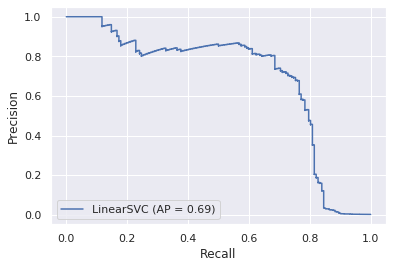

In [0]:
classifier_1 = svm.LinearSVC()
classifier_1.fit(df_selected_1, y_train)
disp_1 = plot_precision_recall_curve(classifier_1, myX_test_1, y_test)

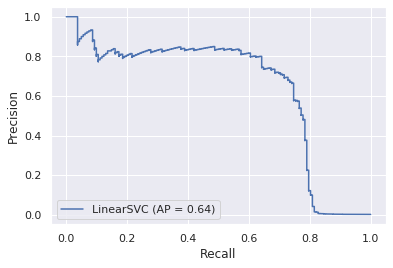

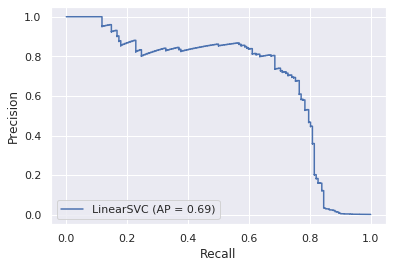

In [0]:
disp = plot_precision_recall_curve(classifier, X_test_1, y_test)
disp_1 = plot_precision_recall_curve(classifier_1, myX_test_1, y_test)

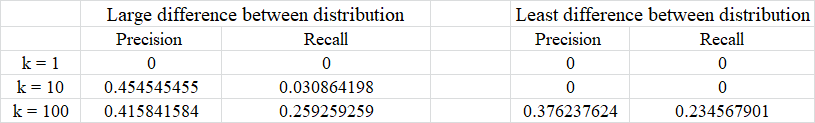

**The precision and recall declines with least difference in distribution between fraudulent and non-fraudulent data. The guassian mixture model learns and predicts better from large difference in distribution comapred to least difference between fraudulent and non-fraudulent data as the mean and variance of the two datasets in a feature can be differentiated by the model better.**